In [1]:
import google.generativeai as genai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import spacy

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
import utilities

In [3]:
API_KEY = os.environ.get('GOOGLE_API_KEY')
genai.configure(api_key=API_KEY)

In [4]:
for m in genai.list_models():
  if 'embedContent' in m.supported_generation_methods:
    print(m.name)

models/embedding-001
models/text-embedding-004
models/gemini-embedding-exp-03-07
models/gemini-embedding-exp


In [5]:
a=pd.read_csv('stjohns-embeddings.csv')
a.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'short_name', 'id', 'conversation',
       'flow_id', 'timestamp', 'content', 'failed', 'author', 'Embeddings'],
      dtype='object')

In [6]:
convs = utilities.read_conversations('stjohns-embeddings.csv', remove_stop_words=False)

if 'Embeddings' not in convs.columns:
    convs = utilities.create_embeddings(convs)

convs

TypeError: the JSON object must be str, bytes or bytearray, not Series

In [ ]:
convs.iloc[0]['Embeddings']

In [7]:
X = np.array(convs['Embeddings'].to_list(), dtype=np.float32)
X.shape

NameError: name 'convs' is not defined

In [1]:
X[0]

NameError: name 'X' is not defined

# T-SNE

In [12]:
tsne = TSNE(random_state=0, max_iter=1000)
tsne_results = tsne.fit_transform(X)

In [13]:
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
#df_tsne['Class Name'] = df_train['Class Name'] # Add labels column from df_train to df_tsne


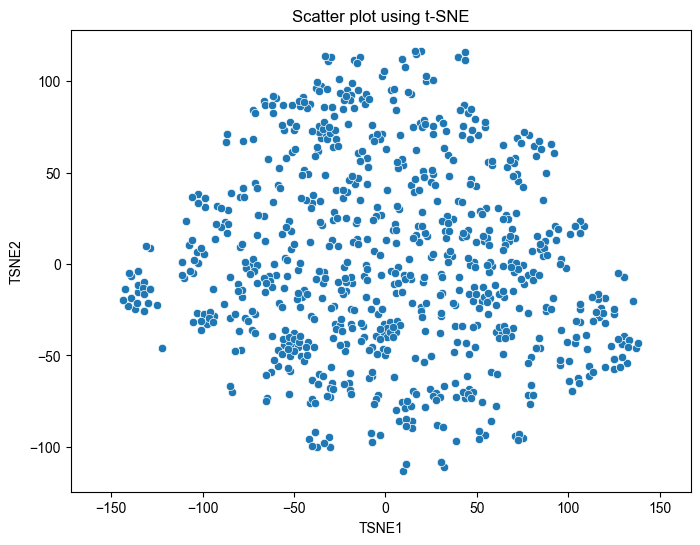

In [14]:
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2')
plt.title('Scatter plot using t-SNE');
plt.xlabel('TSNE1');
plt.ylabel('TSNE2');
plt.axis('equal');

# KMeans

In [15]:
NUM_CLUSTERS = 30

kmeans_model = KMeans(n_clusters=NUM_CLUSTERS, random_state=1, n_init='auto').fit(X)
labels = kmeans_model.fit_predict(X)
df_tsne['Cluster'] = labels

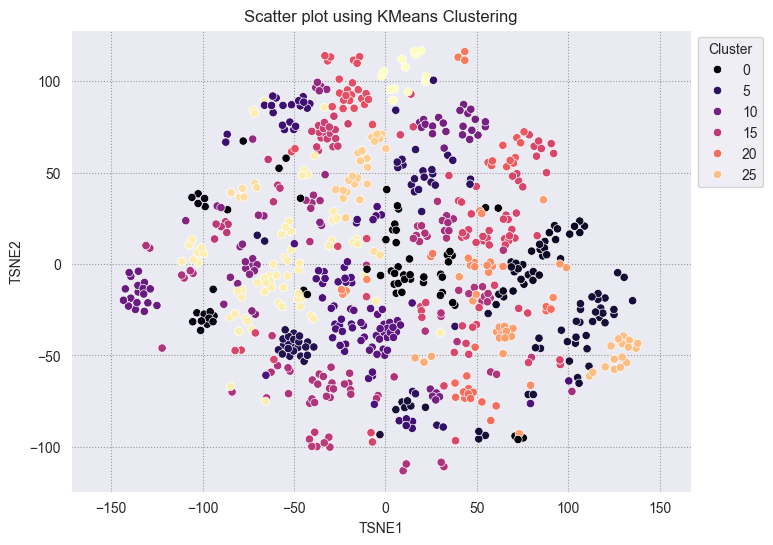

In [17]:
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster', palette='magma')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Scatter plot using KMeans Clustering');
plt.xlabel('TSNE1');
plt.ylabel('TSNE2');
plt.axis('equal');

In [18]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32)

In [19]:
# Print out all of the members of the zeroth cluster
convs[labels == 0]['content'].unique()

array(['time .', 'Microsoft Teams .', 'Service Desk', 'Gaming', 'Esports',
       'cheese', 'queens', 'employment opportunities', 'sports', 'human',
       'basketball tickets', 'athletics', 'masters', 'Johnnies blog',
       'Johnnie Blog', 'resume templates', 'working', 'scholarships',
       'time', 'Android', 'job', 'career services', 'jobs', 'clubs',
       'mens basketball', 'financial services', 'career', 'day',
       'human resources', 'employment', 'Johnnies Blog',
       'events coming ?', 'careers'], dtype=object)

In [20]:
# Print out all of the members of the next cluster
convs[labels == 1]['content'].unique()

array(['GPA ?', 'gpa ?', 'change major ?', 'gpa', 'GPA currently', 'GPA',
       'change major',
       '100 assignment final , skip entirely , grade deserve ?',
       'high school classes required bachelors degree',
       'permissions need pull GPA', 'tell gpa semester ?',
       'switch majors ?'], dtype=object)

In [29]:
# Print out all of the members of the next cluster
convs[labels == 2]['content'].unique()

array(['transcript', 'how do i request a transcript',
       'transcript request', 'transcripts',
       'where can i get my transcript', 'request transcript',
       'i need a transcript', 'request a transcript',
       'i need a copy of my transcript', 'official transcript',
       'i need my transcript', 'order a transcript', 'order transcript',
       'unofficial transcript'], dtype=object)

In [30]:
# Print out all of the members of the next cluster
convs[labels == 3]['content'].unique()

array(['show me the academic calendar', 'what is the final exam schedule',
       'academic calendar', 'school calendar',
       'what is the schedule for the final exams',
       'what is going on with mens basketball season tickets this yera',
       'can you please show me the academic calendar', 'calendar',
       'when does the spring semester start', 'law school calendar',
       'academic calender', 'academic calander', 'course catalog',
       'mens basketball schedule', 'final exam schedule',
       'when does the spring semester starts',
       'academic calendar spring 2024', 'when is spring break',
       'law school academic calendar'], dtype=object)